# Titanic Disaster Problem from Kaggle 

Data from https://www.kaggle.com/c/titanic

Analysis of what sorts of people were likely to survive

Classifier: Logistic Regression; SVM; Random Forest; Decision Tree 

In [204]:
#########
import pandas as pd
%matplotlib inline
import numpy as np

# training data   # this is the path to the Iowa data that you will use
train = pd.read_csv('train.csv')
# that's a classification problem
test = pd.read_csv('test.csv') # many advantages no need to reduce the test data again

numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.columns)
categorical_features = train.select_dtypes(include=[np.object])
print(categorical_features.columns)
train.head()
#data.dtypes

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
train_len = len(train)
print('length of training', train_len)
data=pd.concat(objs=[train, test], axis=0,sort=False).reset_index(drop=True)
print('length of all data', len(data))
print(pd.isnull(data).sum())

length of training 891
length of all data 1309
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


## Covert Category Features to Numeric Features (Embarked, Sex)

In [206]:
#Embarked 
data_ms_Embarked=data[data['Embarked'].isnull()]
data.groupby('Embarked').describe()

def Embarked_approx(cols):
    Embarked = cols[0]
    Fare = cols[1]
    if pd.isnull(Embarked):
        if Fare >=50:
            return 'C'
        elif Fare <=15:
            return 'Q'
        else:
            return 'S'
    else:
        return Embarked

data['Embarked'] = data[['Embarked', 'Fare']].apply(Embarked_approx, axis=1)
codes = {'C':3,'Q':2,'S':1}
data['Embarkedn'] = data['Embarked'].map(codes).astype(int)

data['Fare'].fillna(13, inplace=True) 
#data_ms=data_t[data_t['Fare'].isnull()]
#data_ms
print(pd.isnull(data).sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Embarkedn         0
dtype: int64


In [207]:
#sex
codes = {'male':0,'female':1}
data['Sexn'] = data['Sex'].map(codes).astype(int)
train['Sexn'] = train['Sex'].map(codes).astype(int)

In [208]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [209]:
train[["Sexn", "Survived"]].groupby(['Sexn'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sexn,Survived
1,1,0.742038
0,0,0.188908


In [210]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [211]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [212]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Titles

In [213]:
#title
def process_name(name):
    if name.find('Mrs')>=0:
        return 'Mrs'
    elif name.find('Miss')>=0:
        return 'Miss'
    elif name.find('Mr')>=0:
        return 'Mr'
    elif name.find('Master')>=0:
        return 'Mas'
    else: 
        #print name
        return 'else'


data['Title'] = data.Name.apply(process_name) 
codes = {'Miss':1,'Mr':2,'Mrs':3,'Mas':4,'else':5}
data['Titlen'] = data['Title'].map(codes).astype(int)
#data.groupby('names').Survived.describe()
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Mas,0.575000
1,Miss,0.700000
2,Mr,0.158301
3,Mrs,0.790698
4,else,0.375000


## Creat New Feature FamilySize

In [214]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [215]:
#data.drop(['Cabin','Ticket','Sex','Name','Title','Embarked'],axis=1)
data['FBand'] = pd.cut(data['FamilySize'], 5)
data[['FBand', 'Survived']].groupby(['FBand'], as_index=False).mean().sort_values(by='FBand', ascending=True)

,FBand,Survived
0,"(0.99, 3.0]",0.388750
1,"(3.0, 5.0]",0.545455
2,"(5.0, 7.0]",0.205882
3,"(7.0, 9.0]",0.000000
4,"(9.0, 11.0]",0.000000


In [216]:
F_labels = ['1', '2', '3', '4', '5']
data['Fgroup'] = pd.cut(data.FamilySize, range(1, 12, 2), right=True,labels=F_labels)
data.Fgroup.fillna('1',inplace=True)
data[['Fgroup', 'Survived']].groupby(['Fgroup'], as_index=False).mean().sort_values(by='Fgroup', ascending=True)

#Survived 
import seaborn as sb
#ax = sb.countplot(x="Survived", data=data)
#pd.isnull(data.Fgroup).sum()


## Fare: Skewness

/Users/hanzhang/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


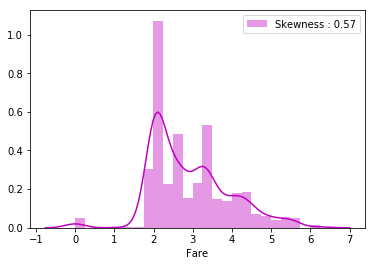

In [217]:
data["Fare"] = data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
g = sb.distplot(data["Fare"], color="m", label="Skewness : %.2f"%(data["Fare"].skew()))
g = g.legend(loc="best")
#Pclass Fare correlate 
#g = sb.distplot(data["Fare"], color="m", label="Skewness : %.2f"%(data["Fare"].skew()))
#g = g.legend(loc="best")
data["Fare"]=data["Fare"]/ data["Fare"].max()

In [218]:
#sb.pairplot(data[["Age","SibSp", "Parch"]],size = 2 ,kind ='scatter',diag_kind='kde')

## Complete Missing Data

In [219]:
#data.groupby('SibSp').Age.median()
mean_ages = data.groupby(['Sex','Pclass'])['Age'].mean()
mean_ages

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [220]:
#age
#g = sb.lmplot(x="Age", y="Survived", data=data, logistic=True)
#age=data.Age(np.isfinite(data.Age))
age = [x for x in data.Age if ~np.isnan(x)]
#age=np.isfinite(data.Age)
#sb.distplot(age,kde=False, color="b")

def process_age(cols):
    if pd.isnull(cols['Age']):
        return mean_ages[cols['Sex'],cols['Pclass']]
    else:
        return cols['Age']
        
data['Age'] = data.apply(process_age, axis=1)
#sb.distplot(data.Age,kde=False, color="b")
   
#g = sb.heatmap(data[["Age","Sex","SibSp","Parch"]].corr(),cmap="BrBG",annot=True)   
#print(pd.isnull(data['Age']).sum())

#sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
# Explore Age vs Survived
#g = sb.FacetGrid(data, col='Survived')
#g = g.map(sb.distplot, "Age")

In [221]:
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
age_labels = ['1', '2', '3', '4', '5']
data['Age_group'] = pd.cut(data.Age, range(0, 81, 16), right=True, labels=age_labels)
data[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean().sort_values(by='Age_group', ascending=True)

,Age_group,Survived
0,1,0.550000
1,2,0.336714
2,3,0.412844
3,4,0.434783
4,5,0.090909


In [222]:
# Cabin_N does not help very much, probably too much missing 
data.groupby('Cabin').mean()
data['Cabin']=data.Cabin.astype(str).str[0]

data.groupby('Cabin').Survived.describe()
codes = {'A':1,'B':2,'C':3,'D':2,'E':2,'F':3,'G':1,'n':0,'T':0}
data['Cabin_N'] = data['Cabin'].map(codes).astype(int)
data.Cabin_N.describe()
data[['Cabin_N', 'Survived']].groupby(['Cabin_N'], as_index=False).mean().sort_values(by='Cabin_N', ascending=True)
#codes = {'2':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8,'n':0}
#data['Cabin_N'] = data['Cabin'].map(codes).astype(int)
#data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Cabin', ascending=True)
#pd.isnull(data).sum()

,Cabin_N,Survived
0,0,0.299419
1,1,0.473684
2,2,0.750000
3,3,0.597222


In [223]:
#data['AgePclass']=data['Age']*data['Pclass']

In [224]:
# important features Pclass, fare, Sex
#data = pd.DataFrame({'Sex': ['male', 'female']})
#(pd.get_dummies(data)) #data_with_dummies= pd.get_dummies(data, prefix='Category_', columns=['Sex'])

# change string data to numbers 

train = data[:train_len]
test = data[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]

print(len(Y_train))
#train

Predictors=['Fare','Sexn','Embarkedn','Fgroup','Titlen','Age_group','Pclass']
X_train=train[Predictors]

891


/Users/hanzhang/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/hanzhang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [225]:
X_test=test[Predictors]
X_test.shape
X_train.head()
#pd.isnull(data).sum()

,Fare,Sexn,Embarkedn,Fgroup,Titlen,Age_group,Pclass
0,0.317521,0,1,1,2,2,3
1,0.683873,1,3,1,3,3,1
2,0.331789,1,1,1,1,2,3
3,0.636672,1,1,1,3,3,1
4,0.334298,0,1,1,2,3,3


## Models

In [226]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)
from sklearn.metrics import classification_report
yp=logisticRegr.predict(X_train)
print(classification_report(Y_train, yp, target_names='Survived'))
accuracy = logisticRegr.score(X_train, Y_train)
print(accuracy)
Y_pred=logisticRegr.predict(X_test)

             precision    recall  f1-score   support

          S       0.83      0.87      0.85       549
          u       0.77      0.73      0.75       342

avg / total       0.81      0.81      0.81       891

0.8114478114478114


/Users/hanzhang/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


In [232]:
#SVM method 
from sklearn.model_selection import train_test_split
from sklearn import svm
svm = svm.SVC(C=5.0)
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
acc_svc = round(svm.score(X_train, Y_train) * 100, 2)
acc_svc
# Support Vector Machines

83.95

In [228]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

#train_sizes, train_scores, test_scores = learning_curve(
#        svm, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)  overfit 

93.71

In [229]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.71

## Learning Curves

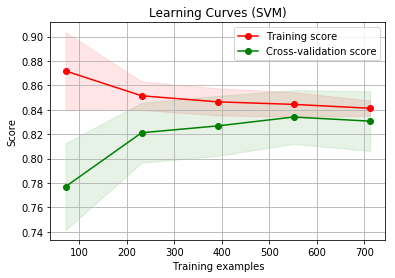

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_train, Y_train

title = "Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(C=5.0)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=1)

title = "Learning Curves (RF)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = RandomForestClassifier(n_estimators=100)
#plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=1)

plt.show()

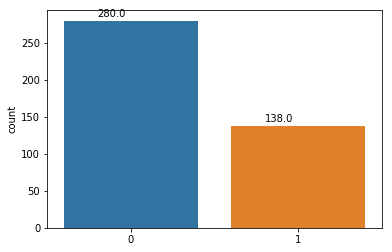

In [234]:
#Predict on the test data: Y_pred
#predictions = svm.predict(Xtest)
#predictions = clf.predict(Xtest)

Y_pred = svm.predict(X_test)

import matplotlib.pyplot as plt
ax = sb.countplot(Y_pred)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+5))


## Results

In [237]:
#build up a dataframe 
submission=pd.DataFrame(
    {'PassengerId': test['PassengerId'],
     'Survived': Y_pred
    })

#write to res.csv
import csv
submission.to_csv('res.csv', encoding='utf-8', index=False)

# submission.to_csv('../output/submission.csv', index=False)

## It achieved accuracy of  0.79904